In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# **1. Import The Dataset**

In [2]:
data=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

# **2. Display Top 5 Rows of The Dataset**

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **3. Check The Last 5 Rows of The Dataset**

In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# **4. Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [5]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 1025
Number of Columns: 14


# **5. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **6. Check Null Values In The Dataset**

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

*There is no null value present in the Dataset*

# **7. Check For Duplicate Data and Drop Them**

In [8]:
data.duplicated().sum()

723

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(302, 14)

# **8. Get Overall Statistics About The Dataset**

In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **9. Draw Correlation Matrix**

In [13]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# **10. How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?**

In [14]:
heart_disease=data['target'].value_counts()
heart_disease.index=['Disease','No-Disease']

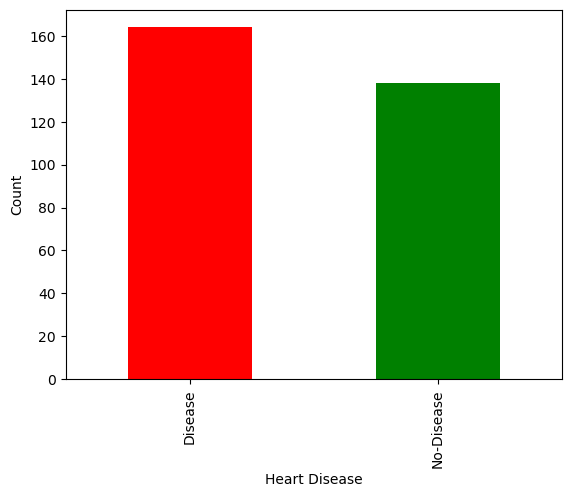

In [15]:
ax=heart_disease.plot(kind='bar',color=['red','green'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# **11. Find Count of  Male & Female in this Dataset**

In [16]:
gender=data['sex'].value_counts()
index=['Male','Female']
gender.index=index

In [17]:
gender

Male      206
Female     96
Name: sex, dtype: int64

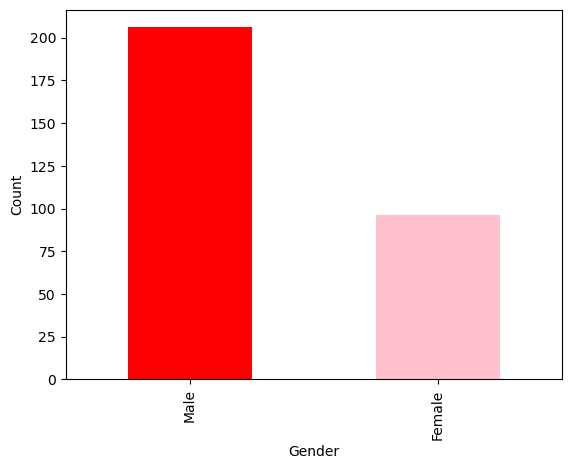

In [18]:
ax=gender.plot(kind='bar',color=['red','pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# **12. Find Gender Distribution According to The Target Variable**

In [19]:
s=data[['sex','target']].value_counts()
s

sex  target
1    0         114
     1          92
0    1          72
     0          24
dtype: int64

In [20]:
s={
    'sex':[1,1,0,0],
    'target':[0,1,1,0],
    'count':[114,92,72,24]
}
df=pd.DataFrame(s)

In [21]:
pivot_df=df.pivot(index='sex',columns='target',values='count')

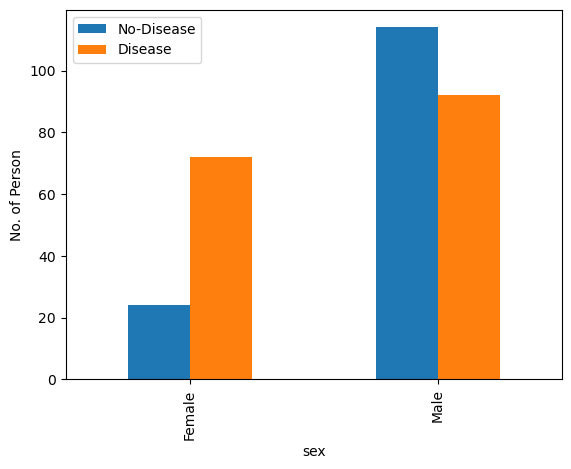

In [22]:
pivot_df.plot(kind='bar')
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.xlabel('sex')
plt.ylabel('No. of Person')
plt.show()

# **13. Check Age Distribution In The Dataset**

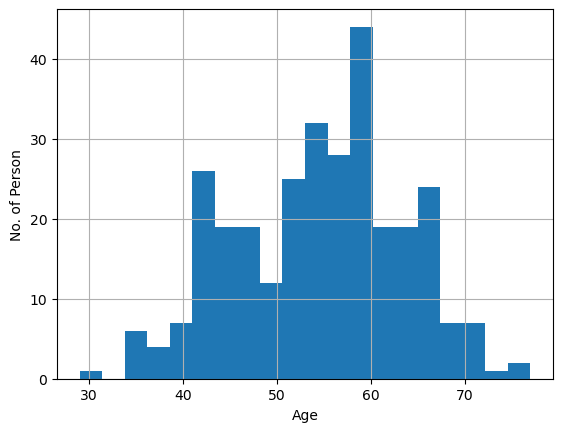

In [23]:
data['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('No. of Person')
plt.show()

# **14. Check Chest Pain Type**

In [24]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

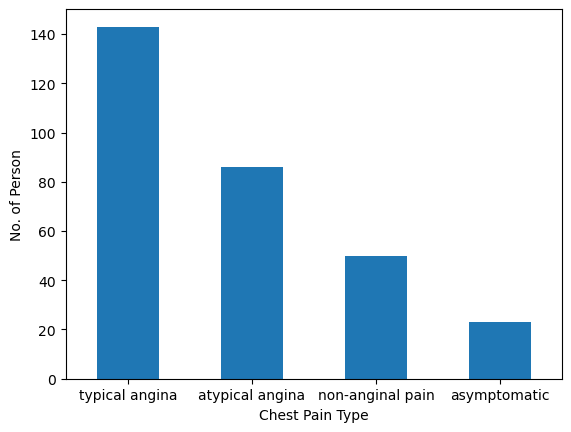

In [25]:
data['cp'].value_counts().plot(kind='bar')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],rotation=0)
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Person')
plt.show()

# **15. Show The Chest Pain Distribution As Per Target Variable**

In [26]:
df=pd.DataFrame(data[['cp','target']].value_counts())
df.reset_index(inplace=True)

In [27]:
df=df.pivot(index='cp',columns='target',values=0)

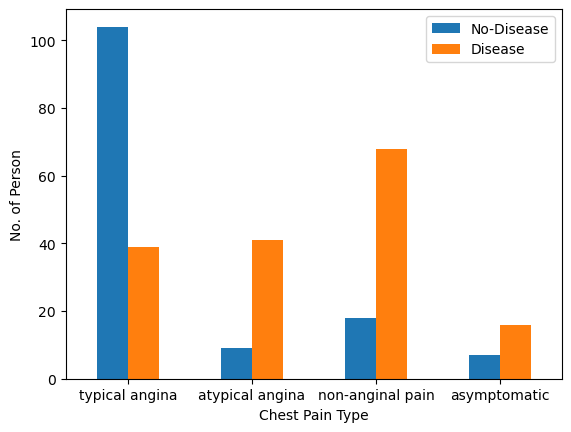

In [28]:
df.plot(kind='bar')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],rotation=0)
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Person')
plt.legend(labels=['No-Disease','Disease'])
plt.show()

# **16. Show Fasting Blood Sugar Distribution According To Target Variable**

In [29]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
df=pd.DataFrame(data[['fbs','target']].value_counts())
df.reset_index(inplace=True)

In [31]:
df=df.pivot(index='fbs',columns='target',values=0)

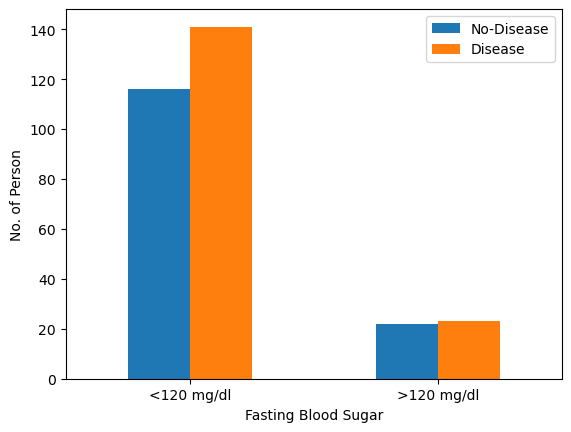

In [32]:
df.plot(kind='bar')
plt.xticks([0,1],["<120 mg/dl",">120 mg/dl"],rotation=0)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('No. of Person')
plt.legend(labels=['No-Disease','Disease'])
plt.show()

# **17.  Check Resting Blood Pressure Distribution**

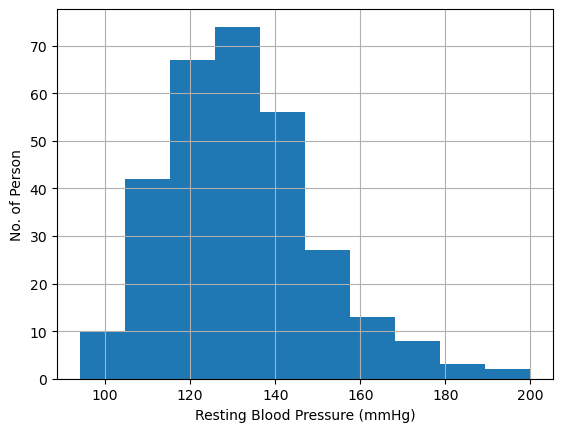

In [33]:
data['trestbps'].hist()
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.ylabel('No. of Person')
plt.show()

# **18. Show Distribution of Serum cholesterol**

In [34]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

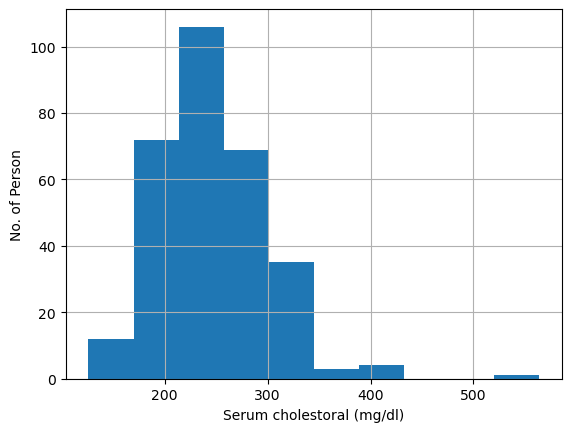

In [35]:
data['chol'].hist()
plt.xlabel('Serum cholestoral (mg/dl)')
plt.ylabel('No. of Person')
plt.show()

# **19. Plot Continuous Variables**

In [36]:
cont_var=[]
for column in data.columns:
    if data[column].nunique() >10:
        cont_var.append(column)

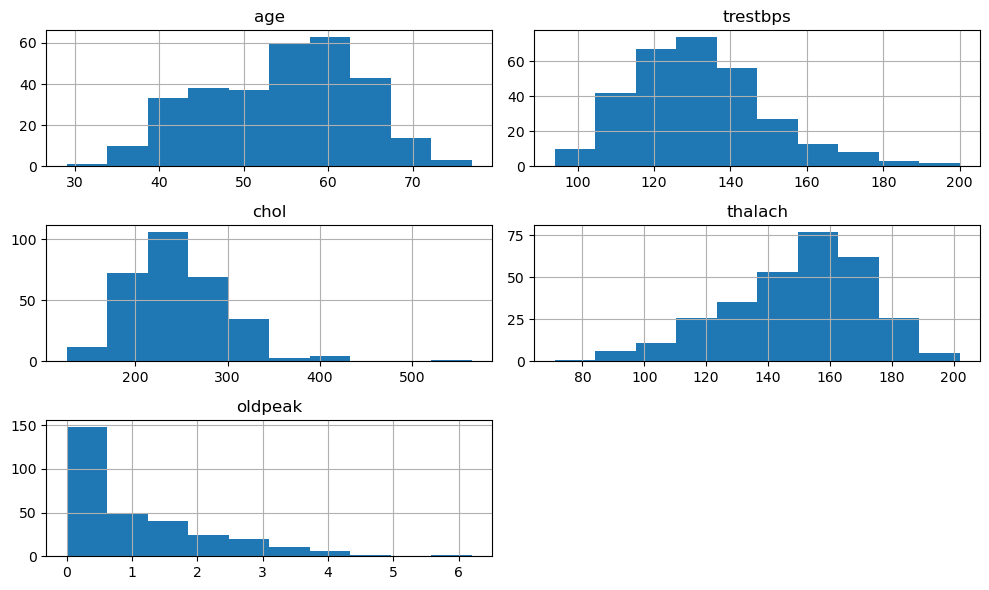

In [37]:
data.hist(cont_var,figsize=(10,6))
plt.tight_layout()
plt.show()